<a href="https://colab.research.google.com/github/Poonam20-design/Poonam20-design/blob/main/Mall_Customer_segmentation_(K_Mean_Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv

In [ ]:
df =pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
 #Conclusion
#1. no null value
# 2. genderr is of dtype object, which need to be taken care of .

In [ ]:
#Conclusion
#1. avg. age of customer is 38
#2. customer that visits mall is having the age b/w 18.70
#having the age. annual income as 60k$.

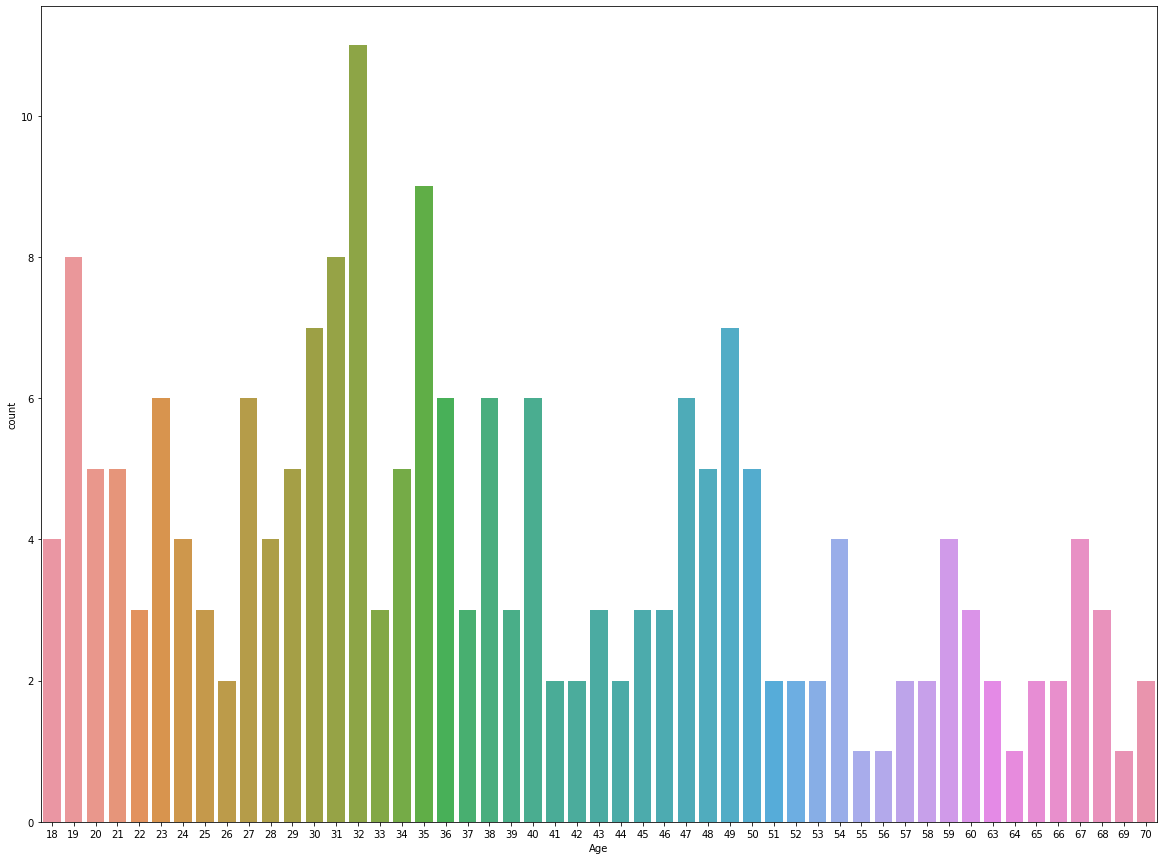

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='Age')

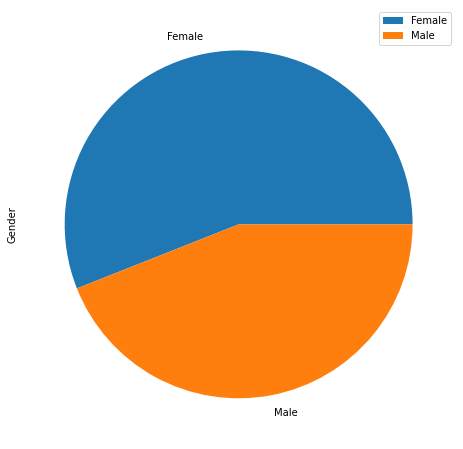

In [ ]:
plt.figure(figsize=(8,8))
df.Gender.value_counts().plot(kind='pie')
plt.legend()

In [ ]:
#   CONCLUSION
#1. No. of females>no.of males
#2.people between age group 30-36 tend to visit mall more often.

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'distribution of annual income')

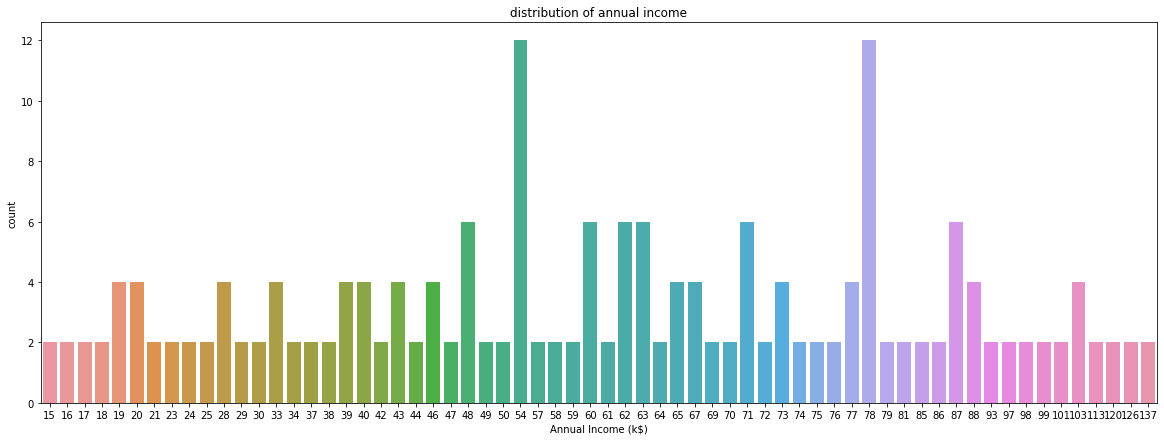

In [ ]:
## Distribution of income
plt.figure(figsize=(20,7))
sns.countplot(df['Annual Income (k$)'],data=df)
plt.title('distribution of annual income')

In [ ]:
#Conclusion:
#The customers that are having the salary of 54k$ and 78k$ are visiting mall more number of times.

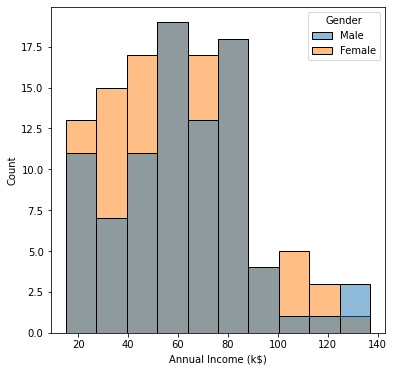

In [ ]:
#show the annual income distribution w.r.t. to the gender
plt.figure(figsize=(6,6))
sns.histplot(df, x='Annual Income (k$)', hue='Gender')

# **ML**

In [ ]:
# label encoder 
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc= LabelEncoder()

In [ ]:
df.Gender = enc.fit_transform(df.Gender)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
lst = []
for i in range(1,11):
    kmodel=KMeans(n_clusters=i,n_init=15,max_iter=500)
    kmodel.fit(df)
    lst.append(kmodel.inertia_)

In [ ]:
lst

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75542.77371510217,
 58348.641363315044,
 51132.703212576904,
 44357.32664902663,
 40861.13914465163,
 37098.35568018133]

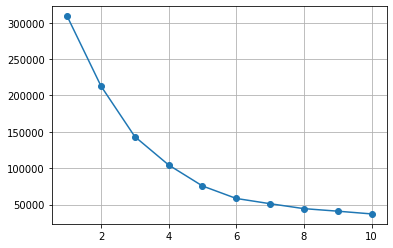

In [ ]:
plt.plot(range(1,11),lst,marker='o')
plt.grid()

In [ ]:
#k=6

In [ ]:
kmodel = KMeans(n_clusters=6)

In [ ]:
kmodel.fit(df)

KMeans(n_clusters=6)

In [ ]:
prediction=kmodel.predict(df)

In [ ]:
kmodel.cluster_centers_

array([[ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895]])

In [ ]:
len(kmodel.cluster_centers_)

6

In [ ]:
df['cluster']=prediction

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,2
1,1,21,15,81,4
2,0,20,16,6,2
3,0,23,16,77,4
4,0,31,17,40,2


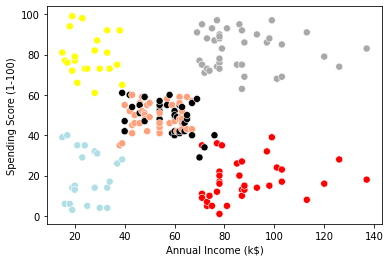

In [ ]:
color= np.array(['darkgray','lightsalmon','powderblue','red','yellow','black'])
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=color[kmodel.labels_],s=50)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
var =linkage(df,method='ward')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',

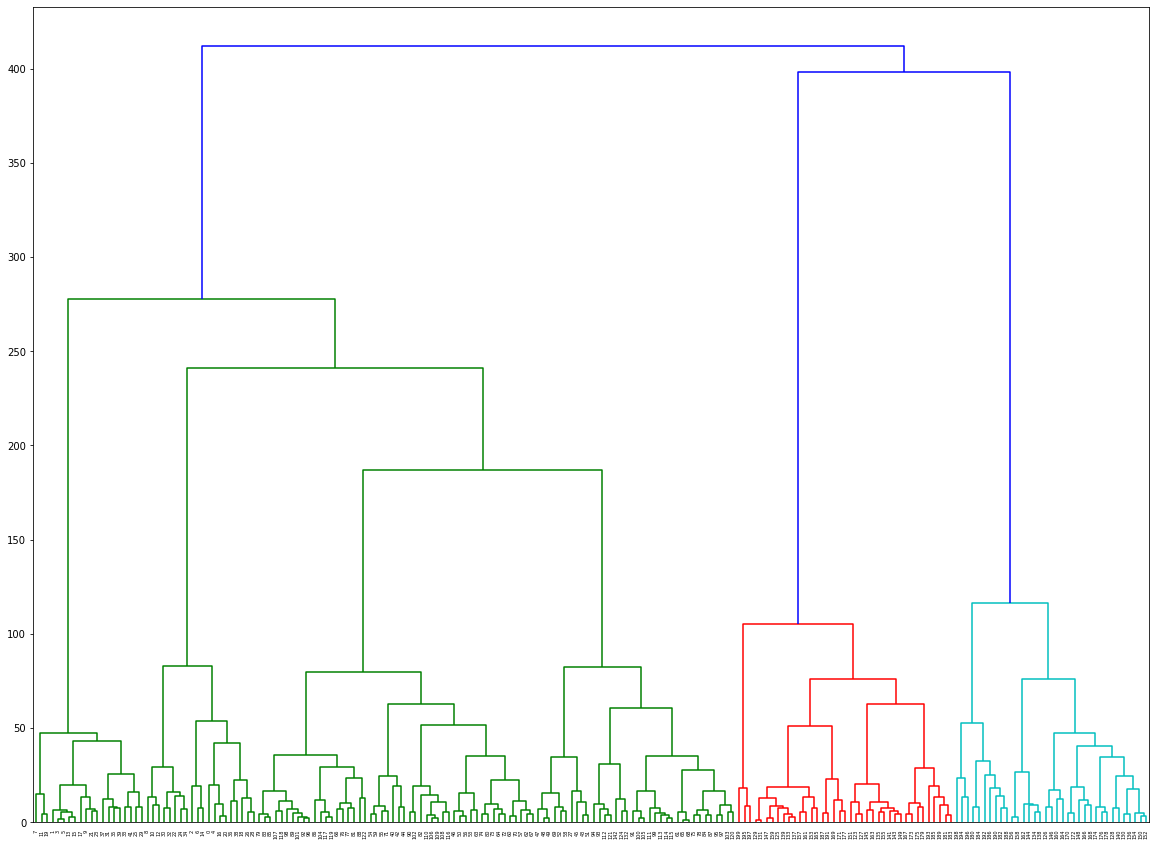

In [ ]:
plt.figure(figsize=(20,15))
dendrogram(var)